In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

pi = np.pi

In [2]:
### 8.33 ###

def coeffs(f, nu, n, T):
    """Given a function f with Nyquist frequency nu,
    return the coefficients (c_{-nu}, ..., c_{nu}
    reconstructing f from a sample of size n on [0, T].

    Parameters:
        f (function)
        nu (int): Nyquist frequency of f
        n (int): n > 2nu, number of equally spaced samples to take of f
        T (float): f sampled on [0, T]
    
    Return:
        c ((n,) ndarray): complex coefficients reconstructing f
    """

    # Check that n > 2nu
    #if n <= 2*nu: raise ValueError('n <= 2nu')

    # Sample points
    t = np.linspace(0, T, n, endpoint=False)
    
    # Sample values of f
    sample = f(t)

    # DFT coefficients
    dft = fft(sample)/n

    # [-nu, -nu+1, ..., -1, 0, 1, ..., nu]
    i = list(range(-nu, nu+1))

    # [-nu+n, -nu+1+n, ..., -1+n, 0, 1, ..., nu]
    k = [l + n if l < 0 else l for l in i]

    # Coefficients of reconstruction of f using Periodic Sampling Theorem
    c = dft[k]

    return c

def g(t, f, nu, n, T):
    """Return the reconstruction g of f as a callable function."""
    
    # Get reconstrution coefficients and values of k for sum
    c = coeffs(f, nu, n, T)
    i = list(range(-nu, nu+1))

    return np.asarray(sum([ck * np.exp(1j * 2*pi/T * k*t) for k, ck in zip(i, c)]))


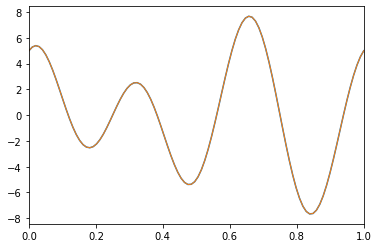

In [3]:
# Test functions coeffs and g by plotting f and reconstruction g
f = lambda x: 3*np.sin(4*pi*x) + 5*np.cos(6*pi*x)
nu, n, T = 3, 7, 1

N = 100
x = np.linspace(0, T, N)

# Plot f and g
plt.plot(x, f(x), label='f', linewidth=3/2)
plt.plot(x, g(x, f, nu, n, T).real, label='g', linewidth=1)
plt.xlim((0,T))
plt.show()

### 8.34
Note that the sine functions in $f$ have periods that are fractions of 1, so f is periodic on 1.

If $T=1$, then $\nu = 6$ since the sine function with the highest frequency has period $\frac{2\pi}{12\pi} = 1/6$, so over $[0, T]$ it has frequency 6.

$g_{13}$ uniquely reconstructs $f$.

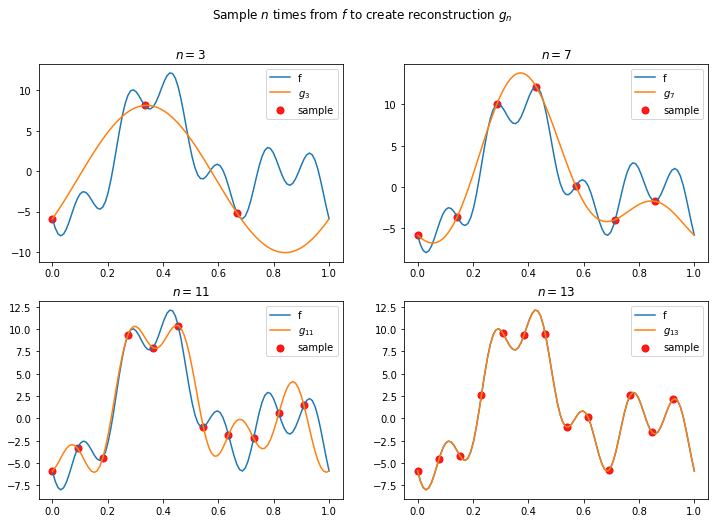

In [4]:
### 8.34 ###

# f(x)
f = lambda x: 1 - 3*np.sin(12*pi*x+7) + 5*np.sin(2*pi*x-1) + 5*np.sin(4*pi*x-3)

# Create figure and subplots
fig, axes = plt.subplots(2,2)
axes = np.ravel(axes)

T = 1
N = 100
x = np.linspace(0, T, N)

for i, n in enumerate((3, 7, 11, 13)):
    # Use this nu so that g works (g assumes that n > 2nu)
    nu = n//2

    # Get sample points
    sample_x = np.linspace(0, T, n, endpoint=False)
    sample_y = f(sample_x)

    # Plot f, g, and sample
    axes[i].plot(x, f(x), label='f')
    axes[i].plot(x, g(x, f, nu, n, T).real, label=f'$g_{{{n}}}$')
    axes[i].scatter(sample_x, sample_y, color='red', s=50, alpha=0.9, label='sample')

    axes[i].set_title(f'$n={n}$')
    axes[i].legend()

fig.suptitle('Sample $n$ times from $f$ to create reconstruction $g_n$')
fig.set_size_inches(12, 8)
plt.show()

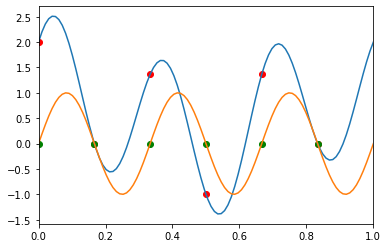

In [35]:
T = 1
b = 6
nu = b/2
f = lambda t: np.sin(b*pi*t) + np.cos(b*pi*t) + np.cos(2*pi*t) + np.sin(pi*t)
N = 100

n = int(2*nu)

sample_points = np.linspace(0, T, n, endpoint=False)
sample_values = f(sample_points)

x = np.linspace(0, T, 100)

plt.plot(x, f(x))
plt.scatter(sample_points, sample_values, color='red')
plt.scatter(sample_points, np.zeros(n), color='green')

g = lambda t: np.sin(b*pi*t)
plt.plot(x, g(x))

plt.xlim(0,T)
plt.show()